# Data cleaning and concatination

In [1]:
import pandas as pd
import os
from tqdm import tqdm
import re
import csv
# import lyricsgenius as lg
import statistics
import matplotlib.pyplot as plt

### Get all datafiles

### Lyrics cleaning function

In [3]:
def clean_lyrics(lyrics):
    lyrics = ' '.join(str(lyrics).splitlines()[:50])
    lyrics = ' '.join(str(lyrics).split()[:200])
    lyrics = re.sub("[\(\[\{].*?[\)\]\}]", "", lyrics)
    return lyrics

### ds2.csv (too big file)

In [16]:
dask_df = dd.read_csv(r"data//ds2.csv", on_bad_lines='skip', encoding='utf-8', quoting=csv.QUOTE_NONE, dtype={'views': 'object', 'year': 'object', 'lyrics': 'object'})

dask_df = dask_df.drop(['year', 'views', 'features', 'id'], axis=1)
dask_df = dask_df.dropna()
dask_df['lyrics'] = dask_df['lyrics'].apply(clean_lyrics, meta=('lyrics', 'str'))
# dask_df = dask_df.drop(dask_df[(dask_df['tag'] == 'misc') | (len(dask_df['lyrics']) < 200)])
dask_df.head()
    
dask_df.to_csv("data_cleaned/data1.csv", index=False)


c:\Users\zakamycze\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\io\csv.py:181: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
c:\Users\zakamycze\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\io\csv.py:181: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
c:\Users\zakamycze\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\io\csv.py:181: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
c:\Users\zakamycze\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\io\csv.py:181: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
c:\Users\zakamycze\AppData\Local\Programs\Pytho

['c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\000.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\001.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\002.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\003.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\004.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\005.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\006.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\007.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\008.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\009.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\010.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\011.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\012.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\013.part',
 'c:\\Piotrek\\kod\\lyrics-to-generes\\data\\data1.csv\\014.pa

In [149]:
chunksize = 1_000_000
df = pd.read_csv(r"data//ds2.csv", nrows=chunksize)

df = df.drop(['year', 'views', 'features', 'id'], axis=1)
df = df.dropna()

df.rename(columns = {'tag': 'genre'}, inplace = True)

df = df.drop(df[(df['genre'] == 'misc') | (df['lyrics'] == "")].index)
df['lyrics'] = df['lyrics'].apply(clean_lyrics)
    
df.to_csv("data_cleaned/data1.csv", index=False)

### spotify_songs.csv

In [126]:
columns_to_read = ['track_name', 'track_artist', 'track_album_name', 'lyrics', 'playlist_subgenre']
df = pd.read_csv(r"data/spotify_songs.csv", usecols=columns_to_read)
df['lyrics'] = df['lyrics'].apply(clean_lyrics)
df.dropna()

df.rename(columns = {'track_name': 'track', 'track_artist':'artist', 'playlist_subgenre': 'genre', 'track_album_name':'album'}, inplace = True)
df = df.drop('album', axis=1)

unique_generes = df['genre'].unique()
print(len(unique_generes))
print(unique_generes)

df.head()

24
['classic rock' 'hard rock' 'new jack swing' 'neo soul' 'dance pop'
 'urban contemporary' 'big room' 'hip pop' 'latin pop' 'indie poptimism'
 'gangster rap' 'album rock' 'post-teen pop' 'trap' 'latin hip hop'
 'southern hip hop' 'tropical' 'electropop' 'progressive electro house'
 'pop edm' 'reggaeton' 'hip hop' 'permanent wave' 'electro house']


,track,artist,lyrics,genre
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,classic rock
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",hard rock
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,neo soul
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,dance pop


### test.csv

In [127]:
df2 = pd.read_csv(r"data/test.csv")
df2 = df2.drop(['Song year', 'Track_id'], axis=1)
df2.dropna()

df2.rename(columns = {'Song': 'track', 'Artist':'artist', 'Lyrics':'lyrics', 'Genre':'genre'}, inplace=True)

df2['lyrics'] = df2['lyrics'].apply(clean_lyrics)
df2['track'] = df2['track'].apply(lambda x: ' '.join(x.split('-')))
df2['artist'] = df2['artist'].apply(lambda x: ' '.join(x.split('-')))

unique_generes = df2['genre'].unique()
print(len(unique_generes))
print(unique_generes)

df2.head()

10
['Hip-Hop' 'Indie' 'Metal' 'Pop' 'Country' 'Jazz' 'Rock' 'R&B'
 'Electronic' 'Folk']


,track,artist,genre,lyrics
0,craftsmanship,buck 65,Hip-Hop,Most folks spend their days daydreaming of fin...
1,come on out,the elwins,Indie,Take your cold hands and put them on my face S...
2,riot,bullet for my valentine,Metal,Are you ready it's time for war We'll break do...
3,that s what girls do,dream street,Pop,You ask me why I change the color of my hair ...
4,believe in a dollar,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...


### train.csv

In [125]:
df3 = pd.read_csv(r"data/train.csv")
df3.dropna()

df3.rename(columns = {'Song': 'track', 'Artist':'artist', 'Lyrics':'lyrics', 'Genre':'genre', 'Language': 'language'}, inplace=True)

df3['lyrics'] = df3['lyrics'].apply(clean_lyrics)
df3 = df3.drop(df3[df3['language'] != 'en'].index)
df3 = df3.drop('language', axis=1)

unique_generes = df3['genre'].unique()
print(len(unique_generes))
print(unique_generes)

df3.head()

10
['Rock' 'Metal' 'Pop' 'Indie' 'Folk' 'Electronic' 'R&B' 'Jazz' 'Hip-Hop'
 'Country']


,artist,track,genre,lyrics
0,12 stones,world so cold,Rock,"It starts with pain, followed by hate Fueled b..."
1,12 stones,broken,Rock,Freedom! Alone again again alone Patiently wai...
2,12 stones,3 leaf loser,Rock,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,You say you know just who I am But you can't i...
4,12 stones,adrenaline,Rock,My heart is beating faster can't control these...


In [132]:
dff = pd.concat([df, df2, df3], ignore_index=True)

unique_generes = dff['genre'].unique()
print(len(unique_generes))
print(unique_generes)

print(len(dff.index))

dff.to_csv(r"data_cleaned/data4.csv", index=False)

dff.head()

34
['classic rock' 'hard rock' 'new jack swing' 'neo soul' 'dance pop'
 'urban contemporary' 'big room' 'hip pop' 'latin pop' 'indie poptimism'
 'gangster rap' 'album rock' 'post-teen pop' 'trap' 'latin hip hop'
 'southern hip hop' 'tropical' 'electropop' 'progressive electro house'
 'pop edm' 'reggaeton' 'hip hop' 'permanent wave' 'electro house'
 'Hip-Hop' 'Indie' 'Metal' 'Pop' 'Country' 'Jazz' 'Rock' 'R&B'
 'Electronic' 'Folk']
276586


,track,artist,lyrics,genre
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,classic rock
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",hard rock
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,neo soul
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,dance pop


### val2.csv

In [134]:
df4 = pd.read_csv(r"data/val2.csv")
df4.dropna()

df4.rename(columns = {'Lyric':'lyrics', 'Genre0':'genre'}, inplace=True)

df4['lyrics'] = df4['lyrics'].apply(clean_lyrics)

unique_generes = df4['genre'].unique()
print(len(unique_generes))
print(unique_generes)

print(len(df4.index))

df4.head()

6
['Rock' 'Hip Hop' 'Heavy Metal' 'Pop' 'Indie' 'Dance']
5389


,lyrics,genre
0,I was nineteen when I came to town they called...,Rock
1,Your coat and hat are gone. I've really can't ...,Rock
2,Use my Body to keep you with mine. Yeah I'm on...,Hip Hop
3,I met her at the 'Burger King'. We fell in lov...,Rock
4,This is the end of everything. A degenerate cu...,Heavy Metal


### lyrics-data.csv

In [135]:
df5 = pd.read_csv(r"data/lyrics-data.csv")
df5.dropna()

df5.rename(columns = {'Lyric':'lyrics', 'Genre0':'genre', 'SName': 'track', 'ALink':'link'}, inplace=True)

df5['lyrics'] = df5['lyrics'].apply(clean_lyrics)
df5 = df5.drop(df5[df5['language'] != 'en'].index)
df5 = df5.drop(['language', 'SLink'], axis=1)

print(len(df5.index))
df5.head()

191814


,link,track,lyrics
69,/ivete-sangalo/,Careless Whisper,I feel so unsure As I take your hand and lead ...
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,..."
88,/ivete-sangalo/,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co..."
111,/ivete-sangalo/,Easy,"Know it sounds funny But, I just can't stand t..."
140,/ivete-sangalo/,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...


### artists-data.csv

In [136]:
df6 = pd.read_csv(r"data/artists-data.csv")
df6.dropna()

df6.rename(columns = {'Artist':'artist', 'Genres':'genre', 'Link':'link'}, inplace=True)

df6 = df6.drop(['Popularity', 'Songs'], axis=1)

unique_generes = df6['genre'].unique()
print(len(unique_generes))
print(unique_generes)

print(len(df6.index))
df6.head()

1751
['Pop; Axé; Romântico' 'Axé' 'Axé; Romântico; Reggae' ...
 'World Music; Indie; New Age' 'World Music; Gospel/Religioso'
 'World Music; Black Music; Blues']
4168


,artist,genre,link
0,Ivete Sangalo,Pop; Axé; Romântico,/ivete-sangalo/
1,Chiclete com Banana,Axé,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,/banda-eva/
3,É O Tchan,Axé,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,/claudia-leitte/


### join artist-data with lyrics-data

In [137]:
df7 = pd.merge(df5, df6, on='link')

df7 = df7.drop(['link'], axis=1)

df7.to_csv(r"data_cleaned/data5.csv", index=False)

print(len(df7.index))
df7.head()

191387


,track,lyrics,artist,genre
0,Careless Whisper,I feel so unsure As I take your hand and lead ...,Ivete Sangalo,Pop; Axé; Romântico
1,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,...",Ivete Sangalo,Pop; Axé; Romântico
2,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co...",Ivete Sangalo,Pop; Axé; Romântico
3,Easy,"Know it sounds funny But, I just can't stand t...",Ivete Sangalo,Pop; Axé; Romântico
4,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...,Ivete Sangalo,Pop; Axé; Romântico


### multifile_data

In [105]:
a = pd.read_csv(r"data/multifile_data/id_genres.csv", delimiter='\t')
b = pd.read_csv(r"data/multifile_data/id_information.csv", delimiter='\t')
c = pd.read_csv(r"data/multifile_data/id_genres.csv", delimiter='\t')

df8 = pd.merge(a, b, on='id')
df8 = pd.merge(df8, c, on='id')

df8.rename(columns = {'album_name':'album', 'song':'track', 'genres_y':'genre'}, inplace=True)

df8 = df8.drop(['id', 'genres_x'], axis=1)

unique_generes = df8['genre'].unique()
print(len(unique_generes))
print(unique_generes)

df8.to_csv(r"data_cleaned/data2.csv", index=False)

print(len(df8.index))
df8.head()

23520
['pop' 'underground hip hop' 'hard rock,rock,classic rock' ...
 'electropop,house,electronic' 'j-pop,folk,pop,soundtrack'
 'synthpop,remix,pop']
109269


,artist,track,album,genre
0,Cheryl,Rain on Me,3 Words,pop
1,Oddisee,After Thoughts,The Beauty in All,underground hip hop
2,Blue Öyster Cult,ME 262,Secret Treaties,"hard rock,rock,classic rock"
3,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded),"symphonic metal,power metal,symphonic power metal"
4,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave"


### Merging cleaned data

In [179]:
a = pd.read_csv(r"data_cleaned/data1.csv")
b = pd.read_csv(r"data_cleaned/data4.csv")
c = pd.read_csv(r"data_cleaned/data5.csv")

print(len(a.index))
print(len(b.index))
print(len(c.index))

907893
276586
191387


In [180]:
a.head()

,title,genre,artist,lyrics
0,Killa Cam,rap,Cam'ron,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,"Yeah, hah, yeah, Roc-A-Fella We invite you t..."
2,Forgive Me Father,rap,Fabolous,Maybe cause I'm eatin And these bastards fiend...
3,Down and Out,rap,Cam'ron,"Ugh, Killa! Baby! Kanye, this that 1970s Her..."
4,Fly In,rap,Lil Wayne,"So they ask me ""Young boy What you gon' do th..."


In [181]:
b.head()

,track,artist,lyrics,genre
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,classic rock
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",hard rock
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",new jack swing
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,neo soul
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,dance pop


In [182]:
c.head()

,track,lyrics,artist,genre
0,Careless Whisper,I feel so unsure As I take your hand and lead ...,Ivete Sangalo,Pop; Axé; Romântico
1,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,...",Ivete Sangalo,Pop; Axé; Romântico
2,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co...",Ivete Sangalo,Pop; Axé; Romântico
3,Easy,"Know it sounds funny But, I just can't stand t...",Ivete Sangalo,Pop; Axé; Romântico
4,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...,Ivete Sangalo,Pop; Axé; Romântico


In [193]:
a.rename(columns = {'title':'track'}, inplace=True)

df = pd.concat([a, b, c], ignore_index=True)

genres = df['genre'].unique()
unique_genres = set()

for i in genres:
    if type(i) != str:
        continue
    for k in i.split(';'):
        unique_genres.add(k)

print(len(unique_generes))
print(unique_generes)

print(len(df.index))
df.head()

1223
['rap' 'rb' 'rock' ... 'World Music; Indie; New Age'
 'World Music; Gospel/Religioso' 'World Music; Black Music; Blues']
1375866


,track,genre,artist,lyrics
0,Killa Cam,rap,Cam'ron,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,"Yeah, hah, yeah, Roc-A-Fella We invite you t..."
2,Forgive Me Father,rap,Fabolous,Maybe cause I'm eatin And these bastards fiend...
3,Down and Out,rap,Cam'ron,"Ugh, Killa! Baby! Kanye, this that 1970s Her..."
4,Fly In,rap,Lil Wayne,"So they ask me ""Young boy What you gon' do th..."


In [199]:
change = {
    'rb': 'r&b',
    'hip hop': 'hip-hop',
    'hip pop': 'hip-hop',
    'album rock': 'rock',
    'post-teen pop': 'pop',
    'indie poptimism': 'indie;pop',
    'latin hip hop': 'latin hip-hop',
    'southern hip hop': 'southern hip-hop',
    'latin hip hop': 'latin hip-hop',
    'pop edm': 'pop;edm'
}


def genre_clean(genre):
    if genre in change.keys():
        return change[genre]
    else:
        return str(genre).lower().replace("; ", ";").replace(r"/", ";")


print(len(df.index))

df['genre'] = df['genre'].apply(genre_clean)
df = df.drop(df[(df.genre == "") | (df.genre == 'nan') | (df.lyrics == "")].index)

genres = df['genre'].unique()
unique_genres2 = set()

for i in genres:
    if type(i) != str:
        continue
    for k in i.split(';'):
        unique_genres2.add(genre_clean(k))

print(len(unique_genres2))
print(unique_genres2)

print(len(df.index))
df.head()

1375857
93
{'rock', 'dance pop', 'new jack swing', 'tropical house', 'metal', 'folk', 'clássico', 'hardcore', 'mpb', 'forró', 'r&b', 'instrumental', 'emocore', 'religioso', 'hip-hop', 'hard rock', 'electropop', 'regional', 'heavy metal', 'romântico', 'dance', 'rockabilly', 'gótico', 'reggaeton', 'axé', 'grunge', 'lo-fi', 'big room', 'velha guarda', 'infantil', 'blues', 'tecnopop', 'psicodelia', 'progressivo', 'permanent wave', 'k-rock', 'pós-punk', 'surf music', 'piano rock', 'bossa nova', 'trap', 'pagode', 'j-pop', 'world music', 'jovem guarda', 'trip-hop', 'house', 'southern hip-hop', 'industrial', 'ska', 'electronica', 'trance', 'rock alternativo', 'edm', 'funk', 'new wave', 'country', 'classic rock', 'post-rock', 'power-pop', 'j-rock', 'electro house', 'trilha sonora', 'jazz', 'chillout', 'soft rock', 'kizomba', 'k-pop', 'coletânea', 'black music', 'fado', 'pop', 'electronic', 'progressive electro house', 'neo soul', 'punk', 'indie', 'disco', 'soul music', 'latin pop', 'reggae', 'u

,track,genre,artist,lyrics
0,Killa Cam,rap,Cam'ron,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,"Yeah, hah, yeah, Roc-A-Fella We invite you t..."
2,Forgive Me Father,rap,Fabolous,Maybe cause I'm eatin And these bastards fiend...
3,Down and Out,rap,Cam'ron,"Ugh, Killa! Baby! Kanye, this that 1970s Her..."
4,Fly In,rap,Lil Wayne,"So they ask me ""Young boy What you gon' do th..."


In [200]:
df.to_csv(r"data_cleaned/data_final.csv", index=False)

## Displaying and analysing content of two final data before last integration

### Data nr 1 with more various genres

In [257]:
df = pd.read_csv(r"data_cleaned/data_final2.csv")
df.head()

,artist,track,album,genre,lyrics
0,Cheryl,Rain on Me,3 Words,pop,Rain On Me Lyrics It's a sunny day So I got no...
1,Oddisee,After Thoughts,The Beauty in All,underground hip hop,NAN
2,Blue Öyster Cult,ME 262,Secret Treaties,"hard rock,rock,classic rock","ME 262 Lyrics Says: ""Willie's done quite a jo..."
3,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded),"symphonic metal,power metal,symphonic power metal",Flames of Revenge Lyrics My princess why must ...
4,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave",Nostalgia LyricsAbsorbing your words Battles r...


### Dropping NAN's and checking number of songs

In [258]:
print(f"Number of rows before droping nan: {len(df.index)}")
df = df.drop(df[df.lyrics == "NAN"].index)
print(f"Number of rows after droping nan: {len(df.index)}")

Number of rows before droping nan: 109269
Number of rows after droping nan: 99988


### Checking 

In [259]:
unique_genres = set()

for row in df.genre:
    for item in row.split(","):
        unique_genres.add(item)
    
print(f"Number of unique genres: {len(unique_genres)}")

Number of unique genres: 810


### Plotting histogram of genre occurances

In [261]:
genres = dict()

for row in df.genre:
    for item in row.split(","):
        if item in genres:
            genres[item] += 1
        else:
            genres[item] = 1
    
print(f"Max value of genre occurances: {max(genres.values())} for {max(genres, key=genres.get)}")
print(f"Min value of genre occurances: {min(genres.values())} for {min(genres, key=genres.get)}")
print(f"Mean value of genre occurances: {statistics.mean(genres.values())}")
print(f"Median value of genre occurances: {statistics.median(genres.values())}")

Max value of genre occurances: 24832 for rock
Min value of genre occurances: 1 for german hip hop
Mean value of genre occurances: 289.04938271604937
Median value of genre occurances: 11.0


Having 810 different genres of which some have only one occurance, it is obvious that we should somehow reduce this number. Firstly we will drop all non-english-lyrics songs and secondly drop every genre that has less than maybe 200 occurances, and then we will see what happens

### Dropping all non-english-lyrics songs

In [61]:
from langdetect import detect
from tqdm import tqdm

In [264]:
df["lang"] = df.apply(lambda x: detect(str(x["lyrics"])), axis=1)

In [265]:
print(f"Number of different languages: {len(df['lang'].unique())}")
print(f"Unique languages: {df['lang'].unique()}")

Number of different languages: 43
Unique languages: ['en' 'es' 'ja' 'pt' 'it' 'et' 'fr' 'pl' 'cy' 'so' 'da' 'ko' 'ru' 'lt'
 'de' 'id' 'ar' 'fi' 'sv' 'tl' 'af' 'bg' 'hr' 'sk' 'no' 'sw' 'nl' 'ca'
 'hi' 'tr' 'hu' 'el' 'vi' 'lv' 'sl' 'ro' 'sq' 'uk' 'mk' 'th' 'zh-cn' 'cs'
 'he']


In [266]:
print("Number of occurances of languages")
df["lang"].value_counts()

Number of occurances of languages


en       82861
pt        6482
es        3085
tl        2197
fr        1023
ko         948
de         611
it         432
pl         422
ja         416
sv         229
ru         181
id         175
tr         120
sw         109
fi         105
no         105
nl          73
ca          67
so          46
hr          44
et          34
hu          28
ro          22
da          21
cy          21
el          21
vi          17
uk          17
af          14
ar          11
sl           6
zh-cn        6
bg           6
lv           6
sk           6
lt           6
sq           4
th           4
he           4
hi           1
mk           1
cs           1
Name: lang, dtype: int64

In [267]:
df = df.drop(df[df["lang"] != "en"].index)

In [268]:
df = df.drop("lang", axis=1)

In [269]:
unique_genres = set()

for row in df.genre:
    for item in row.split(","):
        unique_genres.add(item)
    
print(f"Number of unique genres after droping non-english-lyrics songs: {len(unique_genres)}")
print(f"Number of rows after droping non-english-lyrics songs: {len(df.index)}")

Number of unique genres after droping non-english-lyrics songs: 691
Number of rows after droping non-english-lyrics songs: 82861


### Quick checkpoint

In [270]:
df.to_csv(r"data_cleaned/data_final2_lang_clean.csv", index=False)

In [2]:
df = pd.read_csv(r"data_cleaned/data_final2_lang_clean.csv")

### Dropping generes that have less than 200 occurances

In [4]:
def drop_genres(genres_list):
    new_genres = []
    
    for genre in genres_list.split(","):
        if genres[genre] >= 1000:
            new_genres.append(genre)
    
    return ','.join(new_genres) 
    

def get_new_genres(df):
    genres = dict()
    
    for row in df.genre:
        for item in row.split(","):
            if item in genres:
                genres[item] += 1
            else:
                genres[item] = 1
    
    return genres

genres = get_new_genres(df)
            
df["genre"] = df["genre"].apply(lambda x: drop_genres(x))

### Dropping songs without any genres after cleaning less common genres

In [5]:
df = df.drop(df[df["genre"] == ""].index)

In [6]:
unique_genres = set()

for row in df.genre:
    for item in row.split(","):
        unique_genres.add(item)
    
print(f"Number of unique genres after droping less common genres: {len(unique_genres)}")

Number of unique genres after droping less common genres: 47


### Checking how many genres has each song

In [24]:
df["nb_of_genres"] = df.apply(lambda x: len(x["genre"].split(",")), axis=1)

In [25]:
df["nb_of_genres"].value_counts()

2    16245
1    14486
3     2735
4      956
5      110
6       13
Name: nb_of_genres, dtype: int64

### Dropping based on number of genres

In [11]:
df = df.drop(df[df["nb_of_genres"] == 1].index)

### Manualy check genres

In [12]:
genres = get_new_genres(df)
print(genres.keys())

dict_keys(['hard rock', 'rock', 'classic rock', 'post-punk', 'new wave', 'indie rock', 'experimental', 'shoegaze', 'ambient', 'electronic', 'emo', 'alternative rock', 'pop', 'alternative metal', 'hip hop', 'rap', 'folk', 'electropop', 'synthpop', 'singer-songwriter', 'indie pop', 'metalcore', 'hardcore', 'metal', 'melodic death metal', 'pop punk', 'pop rock', 'lo-fi', 'punk', 'funk', 'dream pop', 'country', 'progressive rock', 'death metal', 'black metal', 'britpop', 'post-hardcore', 'soundtrack', 'blues', 'soul', 'jazz', 'thrash metal', 'grunge', 'progressive metal', 'doom metal', 'gothic metal', 'psychedelic rock'])


### Plotting histogram of genre occurances

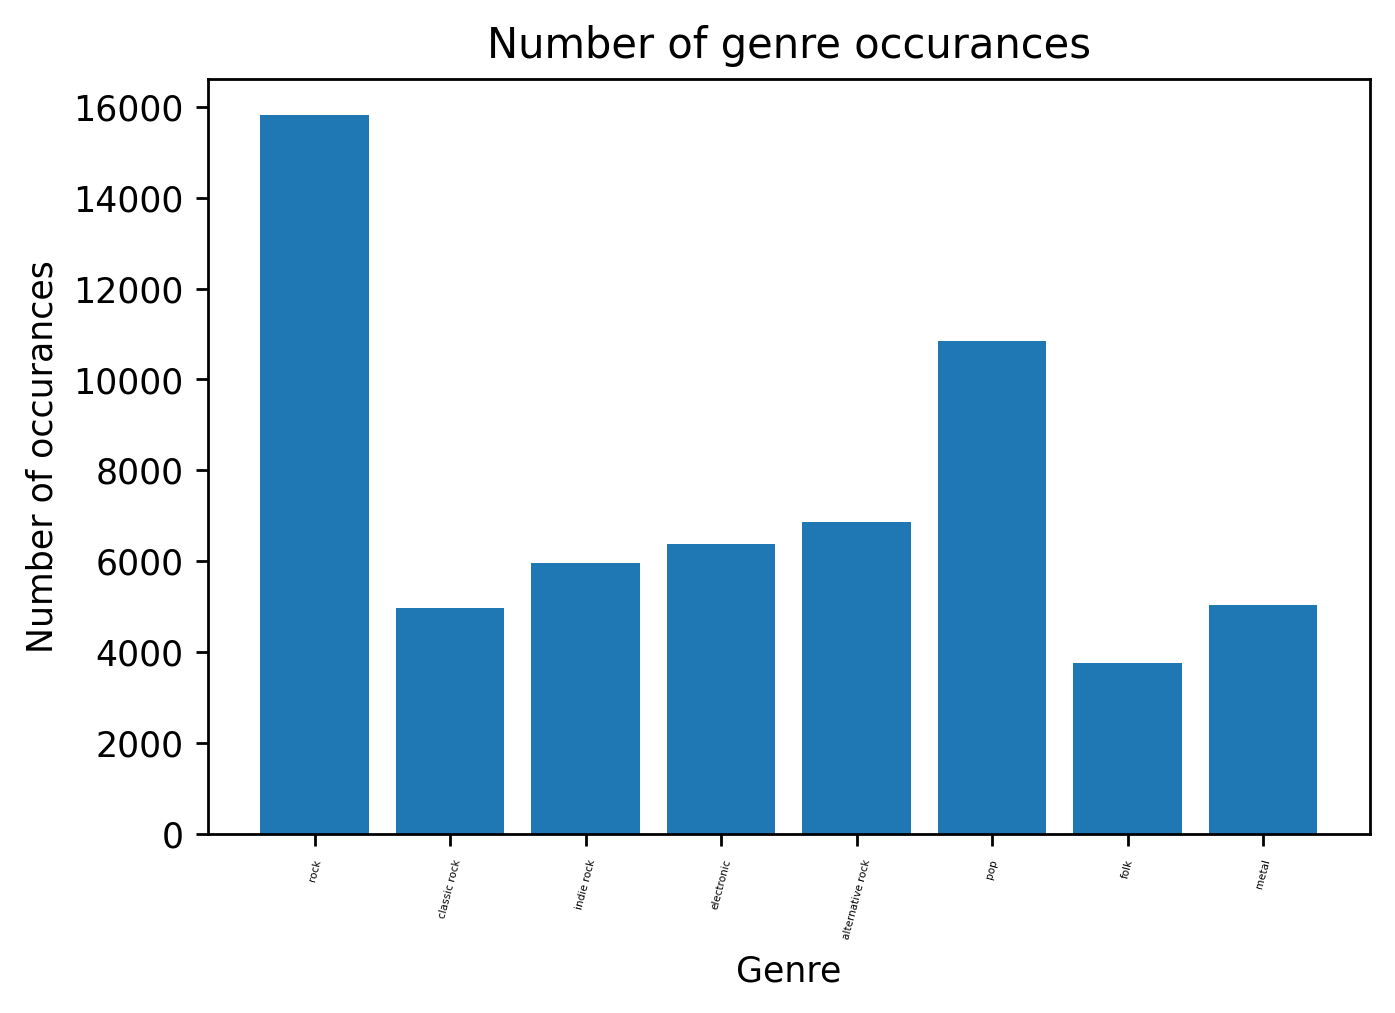

In [23]:
genres = get_new_genres(df)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

### Shady removal

In [17]:
gn = ["rock", "pop", "classic rock", "indie rock", "electronic", "alternative rock", "metal", "folk"]

def drop(x):
    new_genres = []
    
    for genre in x.split(","):
        if genre in gn:
            new_genres.append(genre)
            
    if len(new_genres) == 0:
        return ""
    
    return ','.join(new_genres) 

genres = get_new_genres(df)
            
df["genre"] = df["genre"].apply(lambda x: drop(x))

df = df.drop(df[df["genre"] == ""].index)

In [22]:
df = df.drop(df[df["genre"] == "rock"].index)

In [26]:
df.to_csv(r"data_cleaned/11.csv", index=False)

## Now we should focus on equalizing the number of examples across all genres

In [161]:
df.head()

,artist,track,album,genre,lyrics,nb_of_genres
0,Cheryl,Rain on Me,3 Words,pop,Rain On Me Lyrics It's a sunny day So I got no...,1
1,Blue Öyster Cult,ME 262,Secret Treaties,"rock,classic rock","ME 262 Lyrics Says: ""Willie's done quite a jo...",2
4,Atlas Sound,Criminals,Logos,indie rock,Criminals LyricsThis criminal Walked into my r...,1
5,Gold Panda,Same Dream China,Lucky Shiner,electronic,Jackson Wang - 王嘉尔 JACKSON WANG Lyrics Taking...,1
7,The Cheetah Girls,One World,The Cheetah Girls: One World,pop,One World Lyrics Ch-ch-ch-ch-ka Ch-ch-ch-ch-ka...,1


### Dropping rows where number of genres is only one and number of occurances of these genre is bigger than 2000 with different sampling based on number of occurances

In [162]:


df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 8000], axis=1))].sample(frac=0.9).index)
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 7000], axis=1))].sample(frac=0.8).index)
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 5000], axis=1))].sample(frac=0.7).index)
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 4000], axis=1))].sample(frac=0.6).index)

In [163]:
genres = get_new_genres(df)

plt.figure(dpi=300)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

TypeError: 'NoneType' object is not callable

TypeError: 'NoneType' object is not callable

### Now we will erase some of the most common genres from songs genre labels 

In [164]:
import random

In [68]:
def erase_common_genres(df):
    new_genres = []
    
    for genre in df["genre"].split(","):
        if genres[genre] > 2500 and random.random() < (genres[genre]*0.3/max(genres.values())):
            continue
        else:
            new_genres.append(genre)
    
    return ','.join(new_genres)

In [69]:
genres = get_new_genres(df)
            
df["genre"] = df.apply(erase_common_genres, axis=1)

### Dropping songs without any genres after cleaning the most common genres

In [70]:
df = df.drop(df[df["genre"] == ""].index)

In [71]:
unique_genres = set()

for row in df.genre:
    for item in row.split(","):
        unique_genres.add(item)
    
print(f"Number of unique genres after droping less common genres: {len(unique_genres)}")

Number of unique genres after droping less common genres: 24


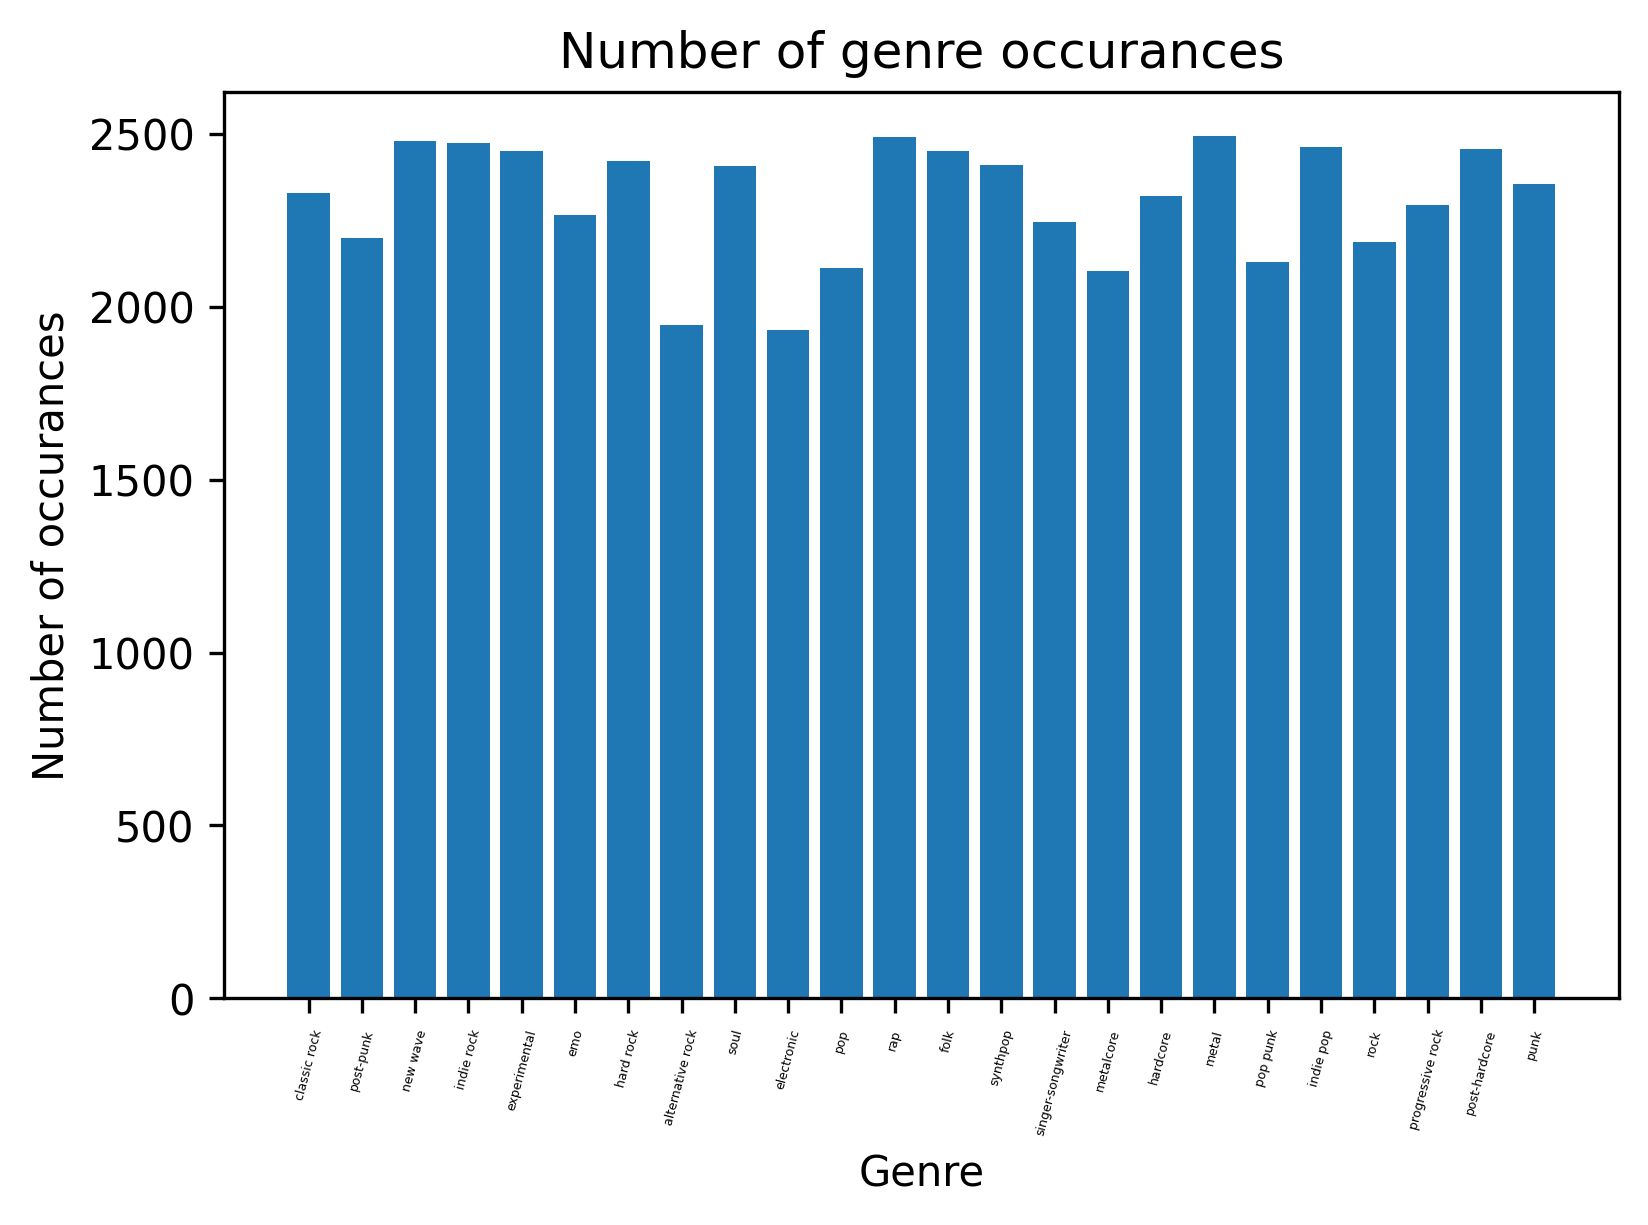

In [72]:
genres = get_new_genres(df)

plt.figure(dpi=300)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

### For now looks good enough

In [73]:
df.head()

,artist,track,album,genre,lyrics,nb_of_genres
1,Blue Öyster Cult,ME 262,Secret Treaties,classic rock,"ME 262 Lyrics Says: ""Willie's done quite a jo...",3
3,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave",Nostalgia LyricsAbsorbing your words Battles r...,2
4,Atlas Sound,Criminals,Logos,"indie rock,experimental",Criminals LyricsThis criminal Walked into my r...,3
8,Annisokay,Coma Blue,Arms,emo,"Coma Blue Lyrics Fuck Nobody, anybody, somebod...",2
9,Nickelback,Burn It To The Ground,Dark Horse,"hard rock,alternative rock,hard rock","Burn It to the Ground Lyrics Well, it's midnig...",6


In [74]:
df = df.drop("nb_of_genres", axis=1)

In [75]:
def drop_title_annotation(x):
    index = x.find("Lyrics")
    return x[index + 6:]

In [76]:
df["lyrics"] = df["lyrics"].apply(lambda x: drop_title_annotation(x))

In [77]:
df.head()

,artist,track,album,genre,lyrics
1,Blue Öyster Cult,ME 262,Secret Treaties,classic rock,"Says: ""Willie's done quite a job"" Says: ""I'..."
3,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave",Absorbing your words Battles raging within me ...
4,Atlas Sound,Criminals,Logos,"indie rock,experimental",This criminal Walked into my room He asked me ...
8,Annisokay,Coma Blue,Arms,emo,"Fuck Nobody, anybody, somebody, who are you? ..."
9,Nickelback,Burn It To The Ground,Dark Horse,"hard rock,alternative rock,hard rock","Well, it's midnight, damn right, we're wound ..."


In [78]:
df.to_csv(r"data_cleaned/data_final2_equalized.csv", index=False)

## Now the same cleaning for second file

In [37]:
df = pd.read_csv(r"data_cleaned/data_final.csv")
df.head()

,track,genre,artist,lyrics
0,Killa Cam,rap,Cam'ron,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Ca..."
1,Can I Live,rap,JAY-Z,"Yeah, hah, yeah, Roc-A-Fella We invite you t..."
2,Forgive Me Father,rap,Fabolous,Maybe cause I'm eatin And these bastards fiend...
3,Down and Out,rap,Cam'ron,"Ugh, Killa! Baby! Kanye, this that 1970s Her..."
4,Fly In,rap,Lil Wayne,"So they ask me ""Young boy What you gon' do th..."


In [38]:
df["genre"].value_counts()

pop                                         569784
rap                                         262047
rock                                        245385
country                                      30099
metal                                        19943
                                             ...  
gospel;religioso;romântico;trilha sonora         1
electronica;dance;gospel;religioso               1
dance;infantil                                   1
romântico;infantil;dance                         1
progressivo;house;electronica                    1
Name: genre, Length: 1207, dtype: int64

In [39]:
print(f"Number of rows before droping nan: {len(df.index)}")
df = df.drop(df[df.lyrics == "NAN"].index)
df = df.dropna()
print(f"Number of rows after droping nan: {len(df.index)}")

Number of rows before droping nan: 1375857
Number of rows after droping nan: 1371918


In [40]:
def drop_genres2(genres_list):
    new_genres = []
    
    for genre in genres_list.split(";"):
        if genres[genre] >= 1000:
            new_genres.append(genre)
    
    return ','.join(new_genres) 
    

def get_new_genres2(df):
    genres = dict()
    
    for row in df.genre:
        for item in row.split(";"):
            if item in genres:
                genres[item] += 1
            else:
                genres[item] = 1
    
    return genres

genres = get_new_genres2(df)
            
df["genre"] = df["genre"].apply(lambda x: drop_genres2(x))
df = df.drop(df[df["genre"] == ""].index)

In [41]:
unique_genres = set()

for row in df.genre:
    for item in row.split(","):
        unique_genres.add(item)
    
print(f"Number of unique genres after droping less common genres: {len(unique_genres)}")

Number of unique genres after droping less common genres: 55


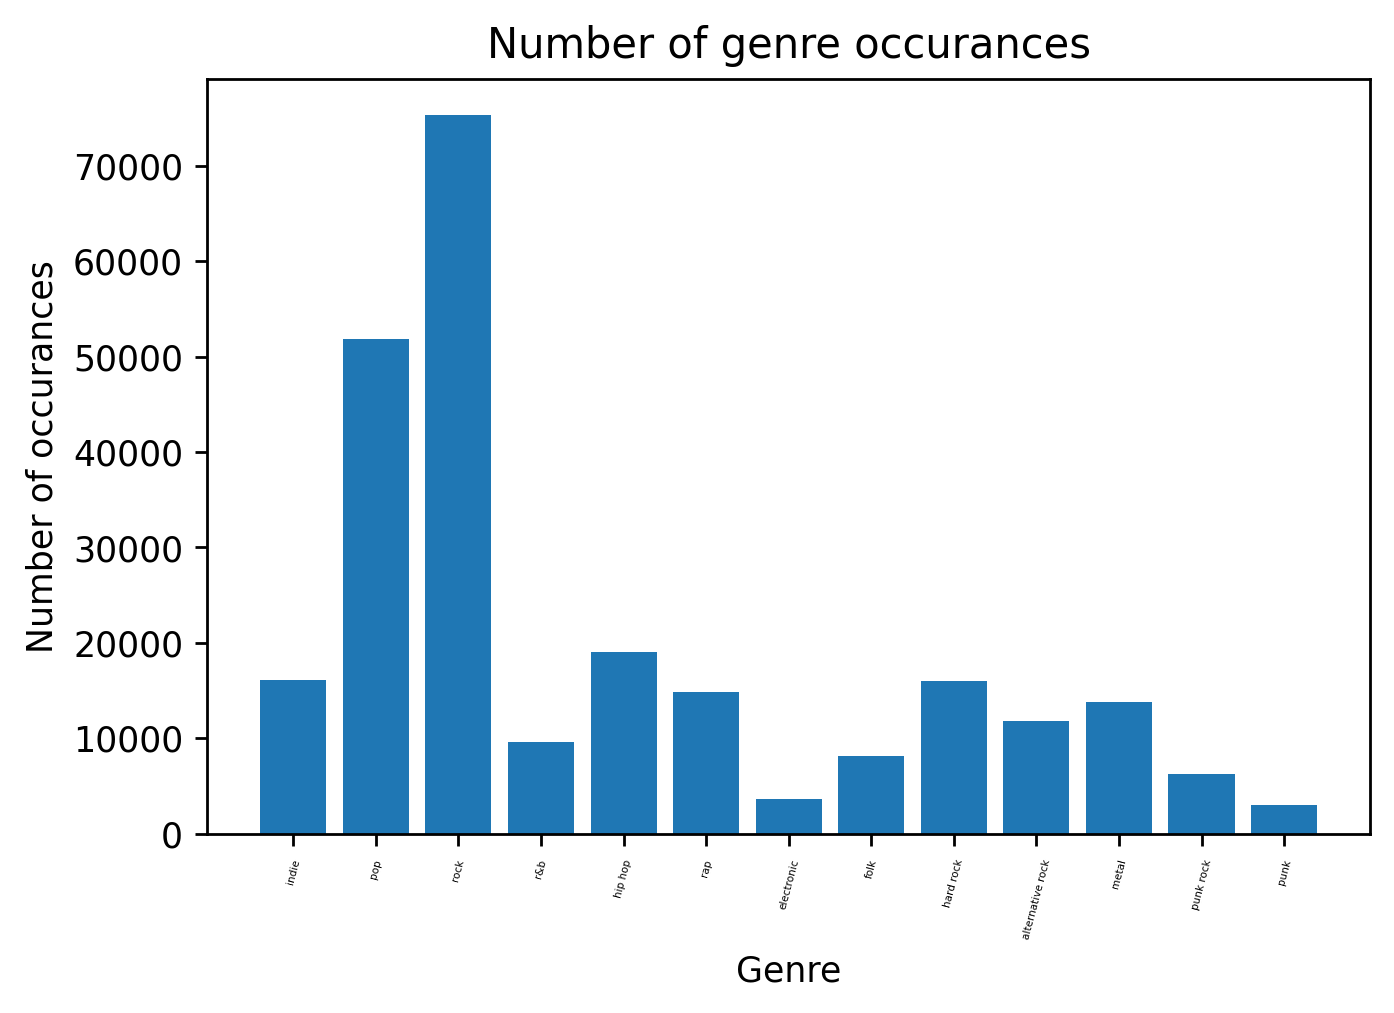

In [55]:
genres = get_new_genres(df)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [56]:
df["nb_of_genres"] = df.apply(lambda x: len(x["genre"].split(",")), axis=1)
df["nb_of_genres"].value_counts()

2    57279
3    35119
4     6363
5      789
Name: nb_of_genres, dtype: int64

### Shady dropping

In [49]:
df = df.drop(df[df['nb_of_genres'] == 1].index)

In [46]:
gn = ["rock", "pop", "indie", "heavy metal", "folk", "r&b", "rap", "hip hop", "electronica", "hard rock", "rock alternativo", "punk", "punk rock"]

def drop(x):
    new_genres = []
    
    for genre in x.split(","):
        if genre in gn:
            new_genres.append(genre)
            
    if len(new_genres) == 0:
        return ""
    
    return ','.join(new_genres) 

genres = get_new_genres(df)
            
df["genre"] = df["genre"].apply(lambda x: drop(x))

df = df.drop(df[df["genre"] == ""].index)

In [53]:
genres = get_new_genres(df)

change_dict = {
    "indie rock": "indie",
    "electronica": "electronic",
    "rock alternativo": "alternative rock",
    "heavy metal": "metal"}

def change_genres_names(genres_list):

    new_genres = []
    
    for genre in genres_list["genre"].split(","):
        if genre.strip() in list(change_dict.keys()) and len(change_dict[genre.strip()]) > 0:
            new_genres.append(change_dict[genre.strip()])
        else:
            new_genres.append(genre.strip())

    return ','.join(new_genres) 

df["genre"] = df.apply(change_genres_names, axis=1)
df = df.drop(df[df["genre"] == ""].index)

In [54]:
df.head()

,track,genre,artist,lyrics,nb_of_genres
907904,Limestone,"indie,pop",Magic City Hippies,How many friends are you gonna set on fire? Ho...,2
907928,Shine - Kygo Remix,"indie,pop",Benjamin Francis Leftwich,I could live in a different place With a diffe...,2
907930,Been A While,"indie,pop",Sam Feldt,It's been a while Since I let you Cross my min...,2
907960,On the Back of Your Neck,"indie,pop",Cienfue,Fighting through the crowd and my heart is bea...,2
907966,This Is Our Time,"indie,pop",WILD,"The sun, the sun is climbing slowly I hold the...",2


### Shady dropping end

In [102]:
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 8000], axis=1))].sample(frac=0.9).index)
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 7000], axis=1))].sample(frac=0.8).index)
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 5000], axis=1))].sample(frac=0.7).index)
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 4000], axis=1))].sample(frac=0.6).index)

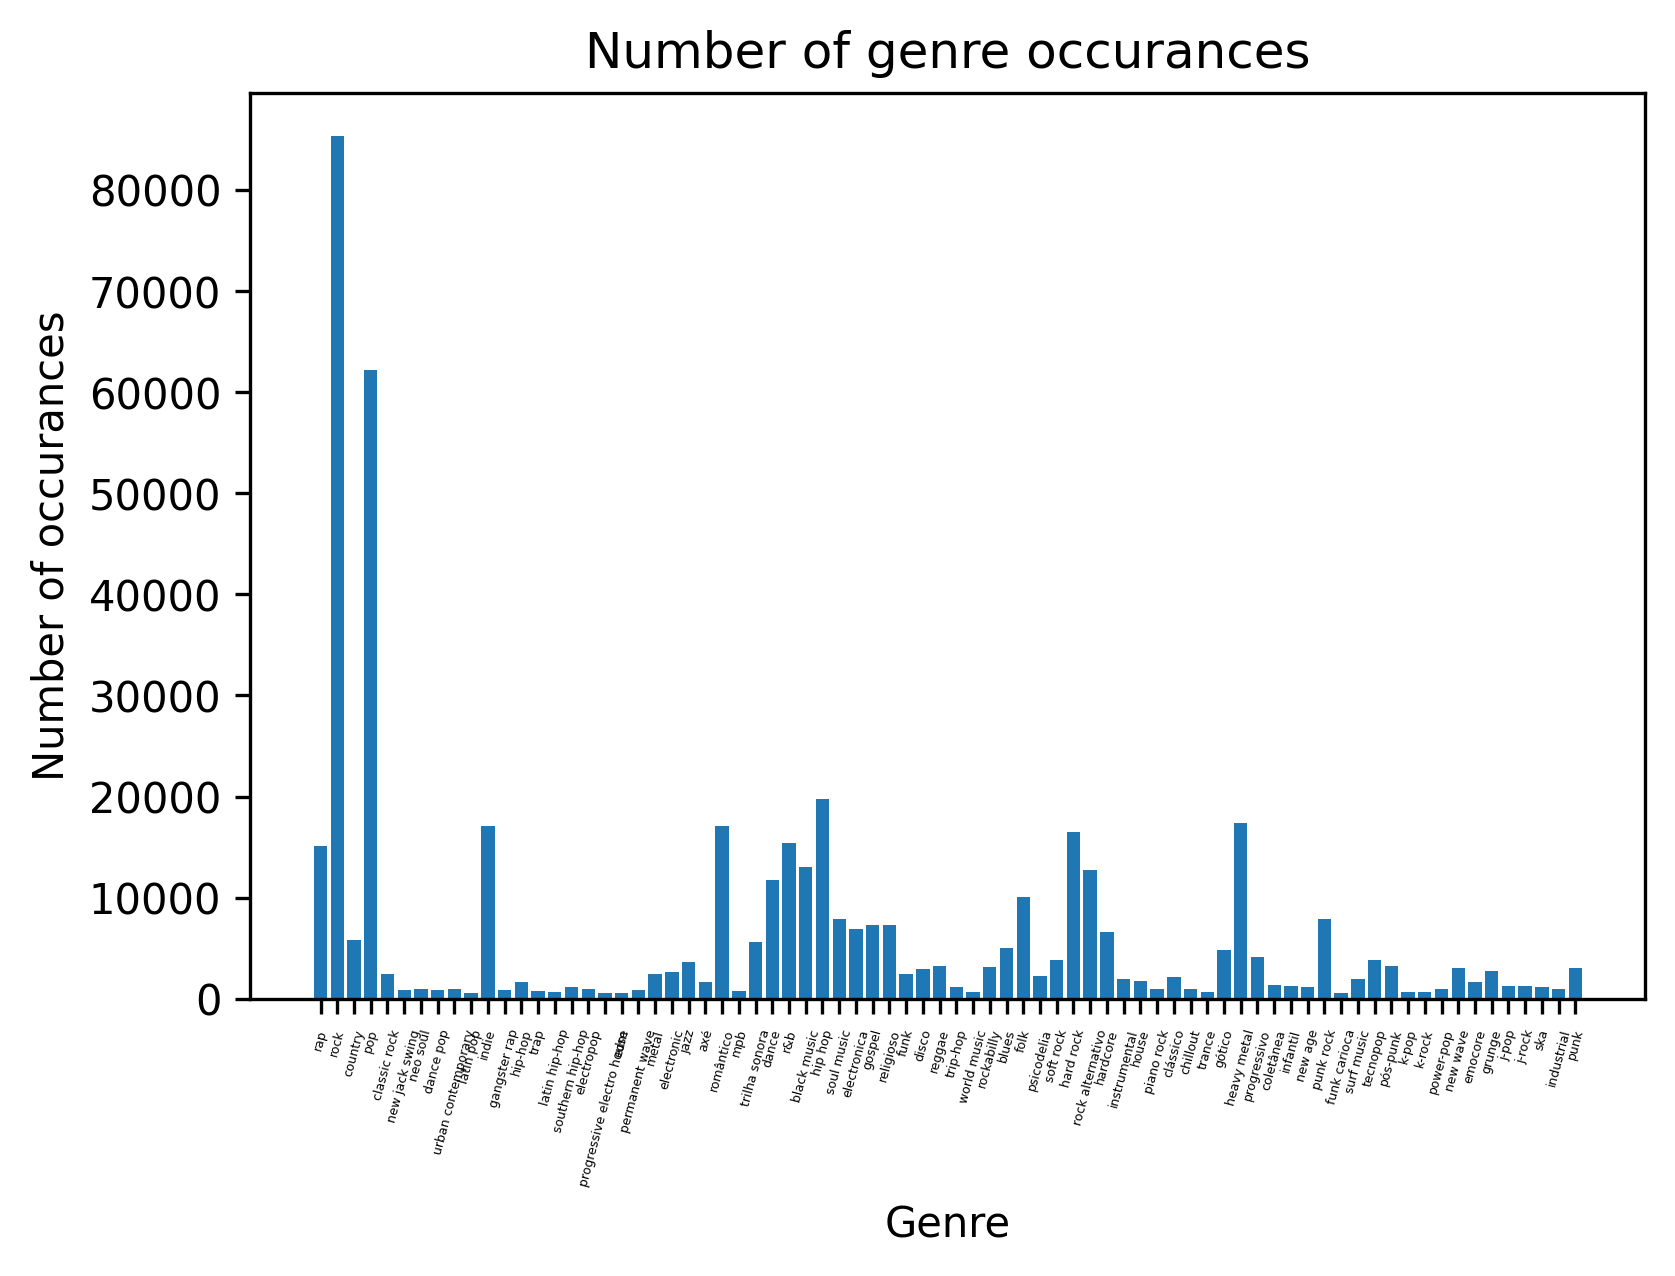

In [103]:
genres = get_new_genres(df)

plt.figure(dpi=300)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [119]:
genres = get_new_genres(df)
            
df["genre"] = df.apply(erase_common_genres, axis=1)
df = df.drop(df[df["genre"] == ""].index)

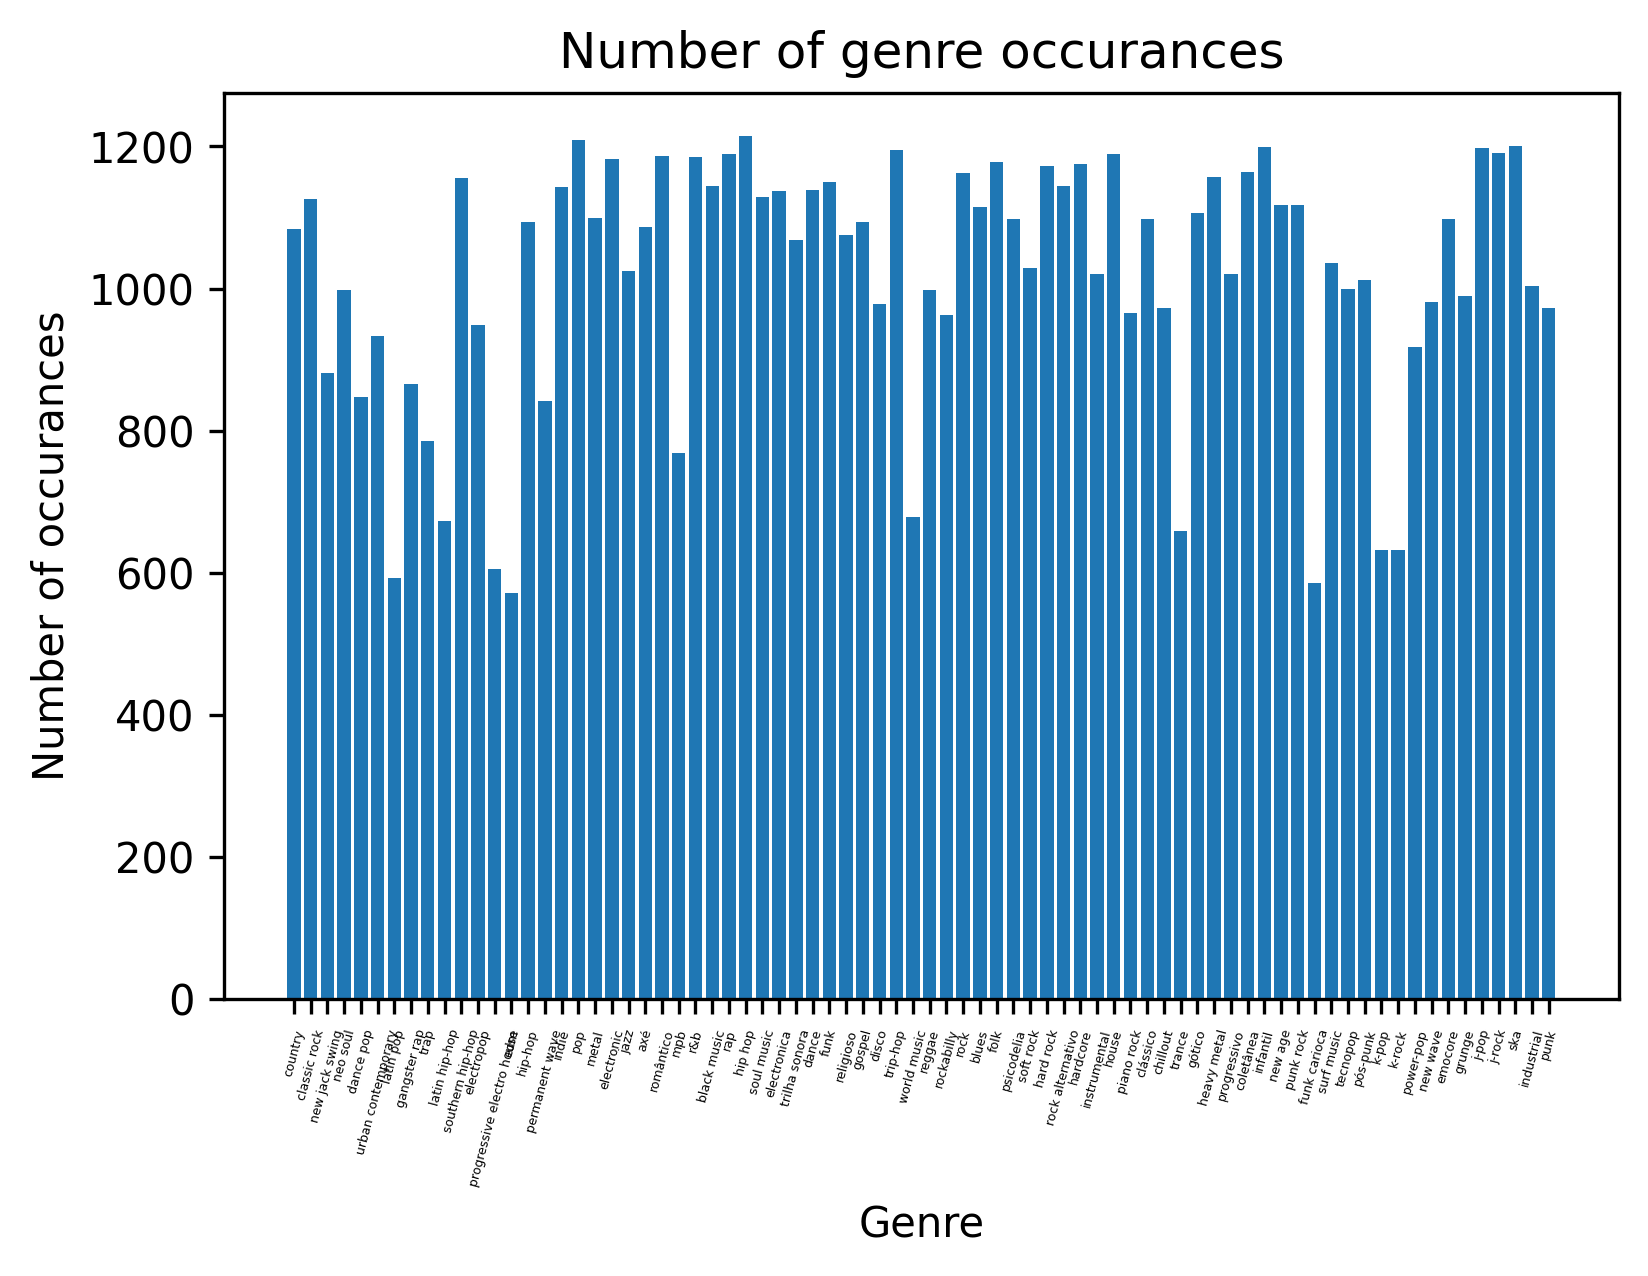

In [120]:
genres = get_new_genres(df)

plt.figure(dpi=300)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [62]:
def detect_lang(x):
    try:
        lang = detect(str(x["lyrics"]))
    except Exception as e:
        return ""
    
    return lang

In [63]:
df["lang"] = df.apply(lambda x: detect_lang(x), axis=1)

In [64]:
print("Number of occurances of languages")
df["lang"].value_counts()

Number of occurances of languages


en    99316
id       33
so       31
de       30
tl       23
af       17
pt       15
fr       12
ca       11
sw       10
cy        8
it        7
nl        7
es        6
          4
sv        3
no        3
ro        3
lv        2
da        2
hr        2
sl        1
hu        1
vi        1
cs        1
et        1
Name: lang, dtype: int64

In [65]:
df = df.drop(df[df["lang"] != "en"].index)
df = df.drop("lang", axis=1)

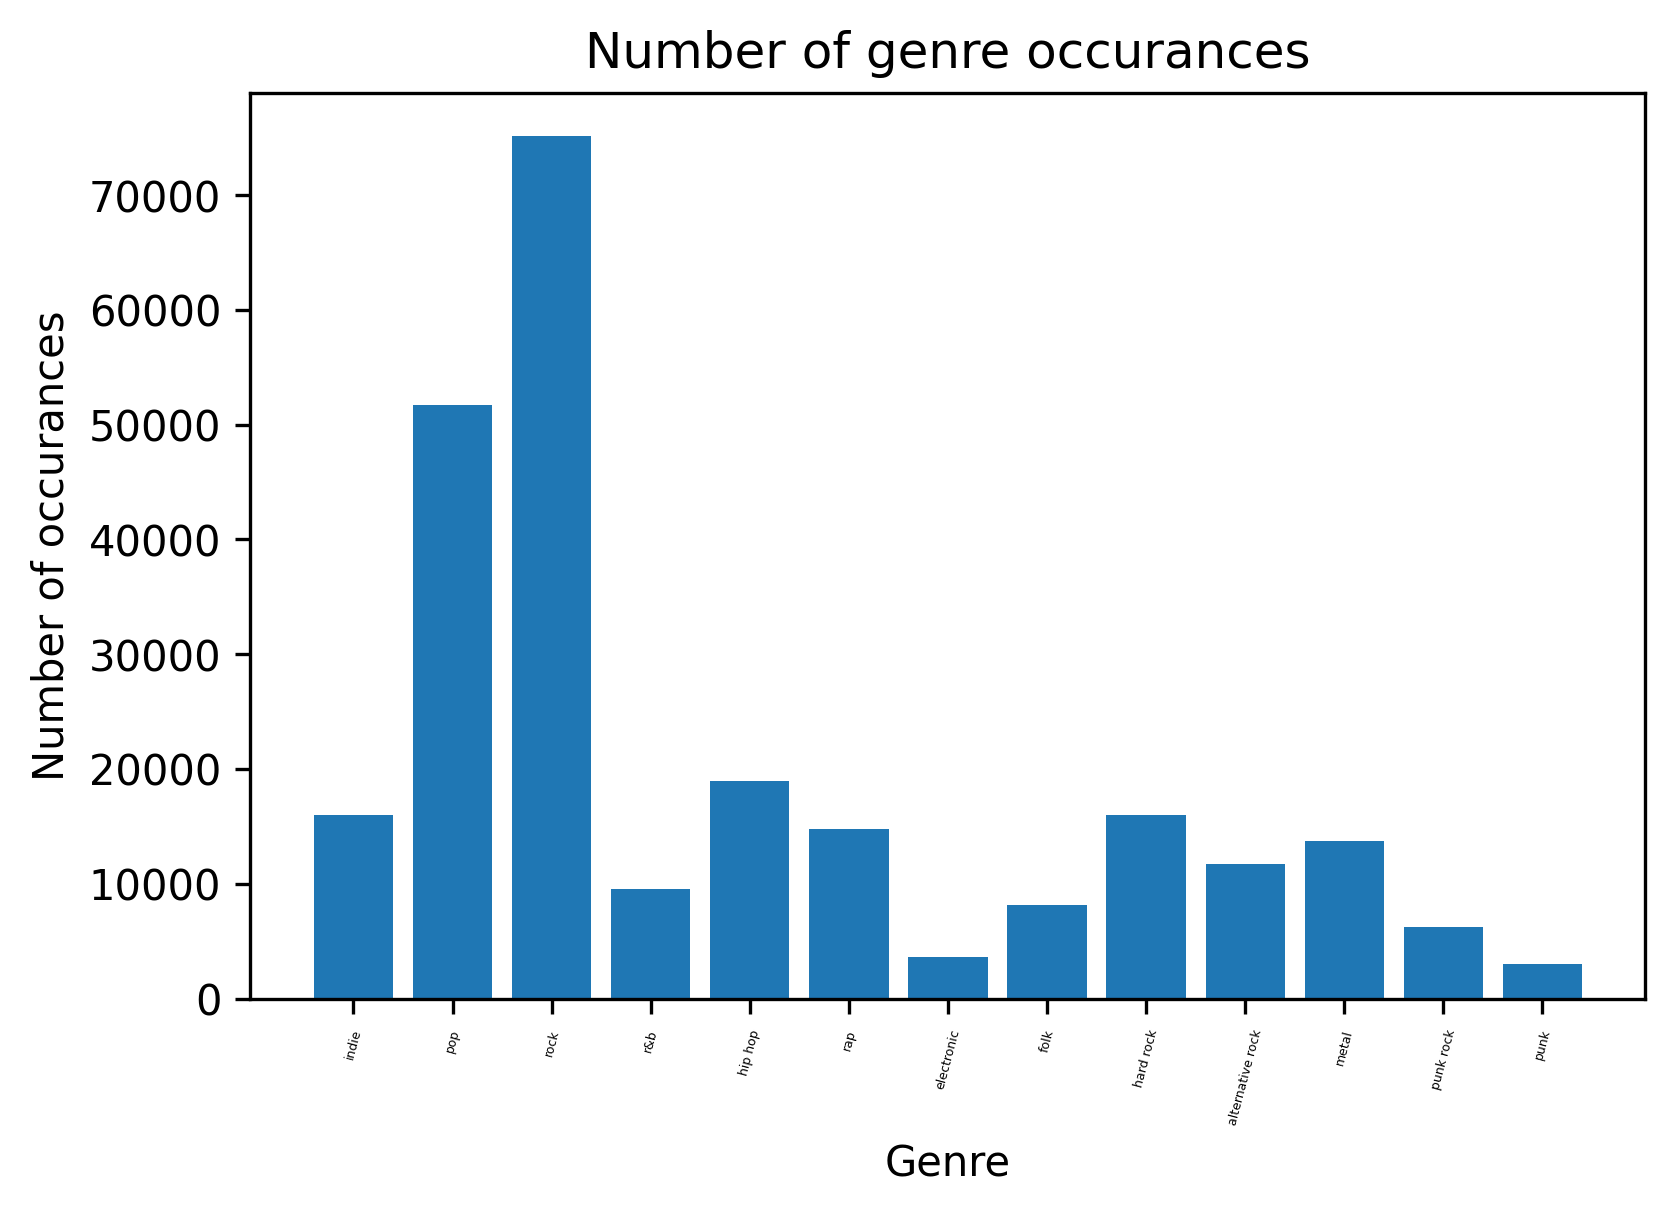

In [66]:
genres = get_new_genres(df)

plt.figure(dpi=300)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [132]:
df["genre"] = df["genre"].apply(lambda x: drop_genres(x))
df = df.drop(df[df["genre"] == ""].index)

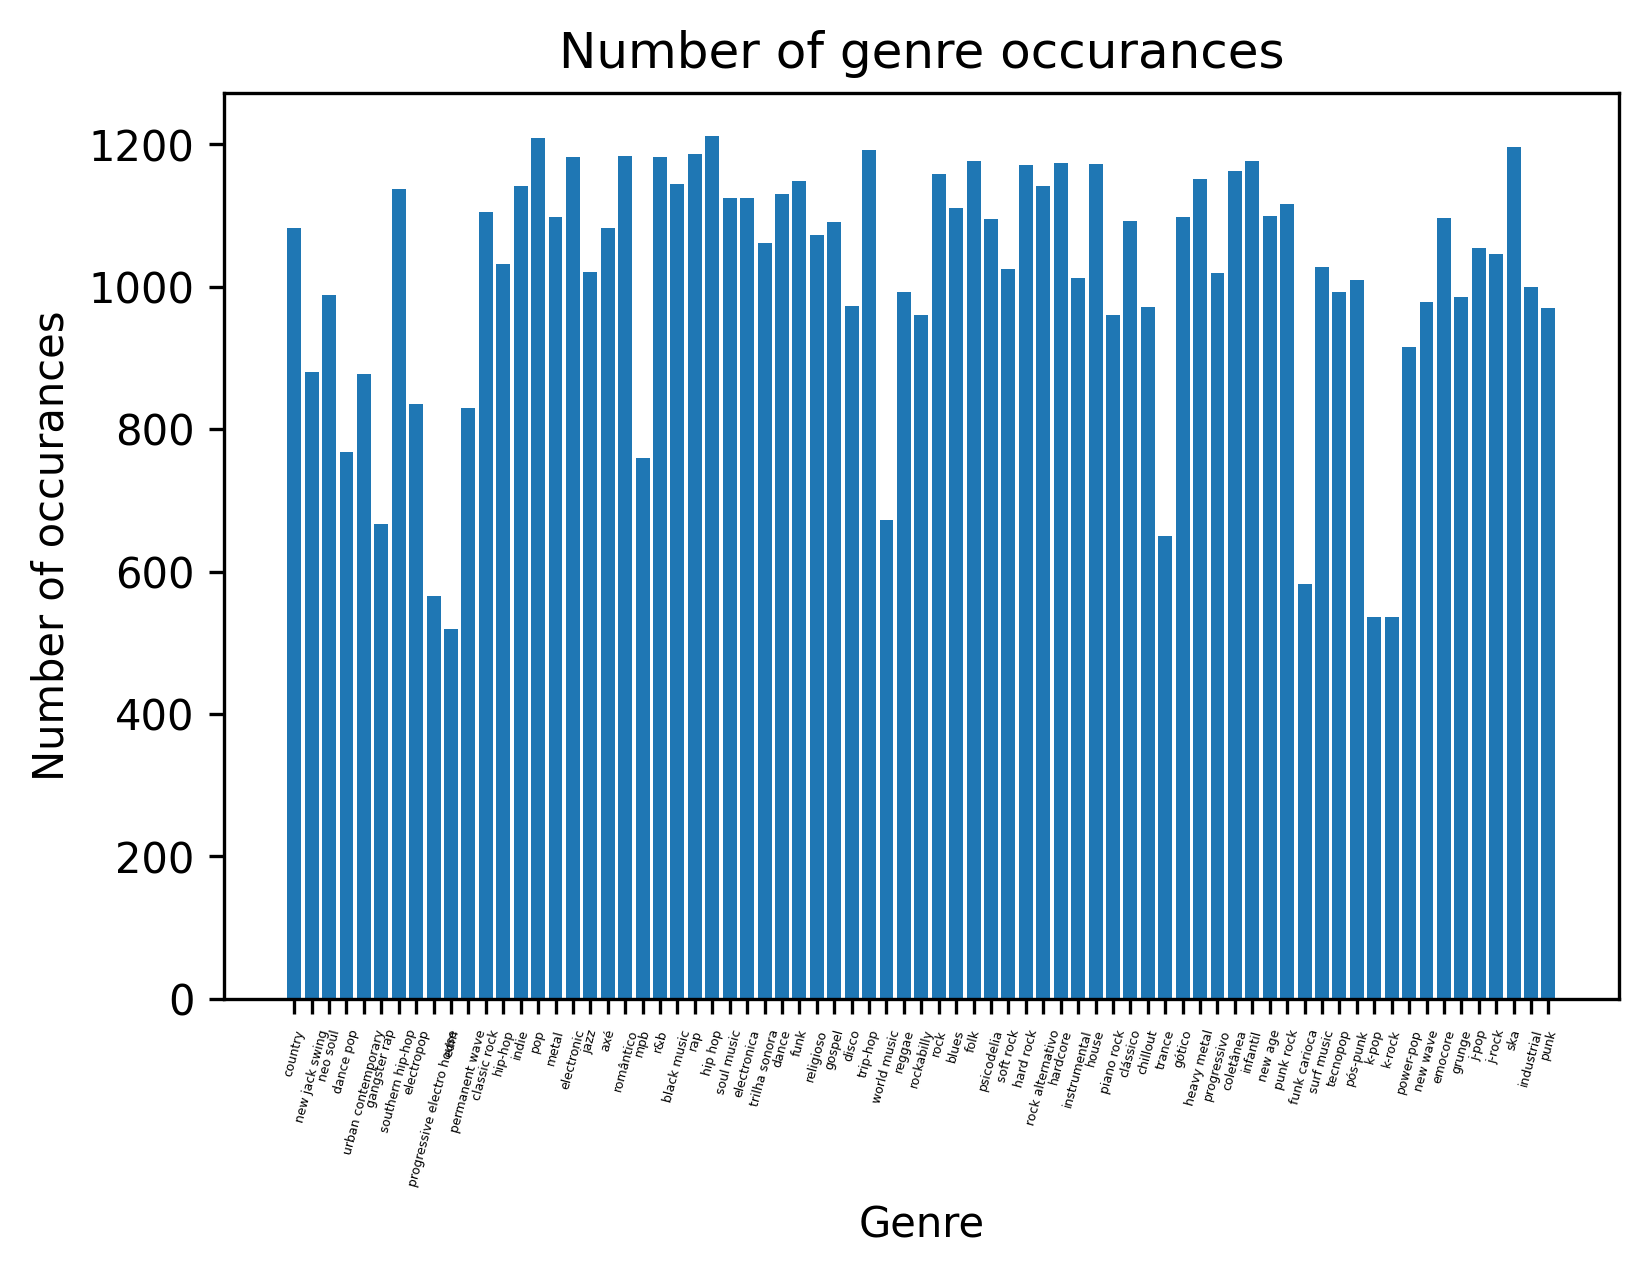

In [133]:
genres = get_new_genres(df)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [134]:
df = df.drop("nb_of_genres", axis=1)
df.head()

,track,genre,artist,lyrics
281308,Girl in a Country Song,country,Maddie & Tae,No country music was harmed in the making of ...
907895,Poison,new jack swing,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U..."
907896,Baby It's Cold Outside (feat. Christina Aguilera),neo soul,CeeLo Green,I really can't stay Baby it's cold outside I'v...
907897,Dumb Litty,dance pop,KARD,Get up out of my business You don't keep me fr...
907898,Soldier,urban contemporary,James TW,"Hold your breath, don't look down, keep trying..."


In [135]:
print(f"Number of songs: {len(df.index)}")

Number of songs: 63541


In [136]:
df.to_csv(r"data_cleaned/data_final_equalized.csv", index=False)

### Shady concat

In [67]:
df.to_csv(r"data_cleaned/22.csv", index=False)

In [68]:
df1 = pd.read_csv(r"data_cleaned/11.csv")
df2 = pd.read_csv(r"data_cleaned/22.csv")

In [75]:
df1.head()

,artist,track,genre,lyrics,nb_of_genres
0,Blue Öyster Cult,ME 262,"rock,classic rock","Says: ""Willie's done quite a job"" Says: ""I'...",2
1,Atlas Sound,Criminals,indie rock,This criminal Walked into my room He asked me ...,1
2,Gold Panda,Same Dream China,electronic,"Taking my path step by step, it ain’t so bad ...",1
3,Nickelback,Burn It To The Ground,"rock,alternative rock,rock,alternative rock","Well, it's midnight, damn right, we're wound ...",4
4,Velvet,Chemistry (Radio Version),"pop,electronic,rock",It's the perfect night To go out and do it rig...,3


In [73]:
df2.head()

,track,genre,artist,lyrics,nb_of_genres
0,Limestone,"indie,pop",Magic City Hippies,How many friends are you gonna set on fire? Ho...,2
1,Shine - Kygo Remix,"indie,pop",Benjamin Francis Leftwich,I could live in a different place With a diffe...,2
2,Been A While,"indie,pop",Sam Feldt,It's been a while Since I let you Cross my min...,2
3,On the Back of Your Neck,"indie,pop",Cienfue,Fighting through the crowd and my heart is bea...,2
4,This Is Our Time,"indie,pop",WILD,"The sun, the sun is climbing slowly I hold the...",2


In [71]:
def drop_title_annotation(x):
    index = x.find("Lyrics")
    return x[index + 6:]

df1["lyrics"] = df1["lyrics"].apply(lambda x: drop_title_annotation(x))

In [74]:
df1 = df1.drop("album", axis=1)

In [76]:
df = pd.concat([df1, df2], ignore_index=True)

In [80]:
df.head()

,artist,track,genre,lyrics,nb_of_genres
0,Blue Öyster Cult,ME 262,"rock,classic rock","Says: ""Willie's done quite a job"" Says: ""I'...",2
1,Atlas Sound,Criminals,indie rock,This criminal Walked into my room He asked me ...,1
2,Gold Panda,Same Dream China,electronic,"Taking my path step by step, it ain’t so bad ...",1
3,Nickelback,Burn It To The Ground,"rock,alternative rock,rock,alternative rock","Well, it's midnight, damn right, we're wound ...",4
4,Velvet,Chemistry (Radio Version),"pop,electronic,rock",It's the perfect night To go out and do it rig...,3


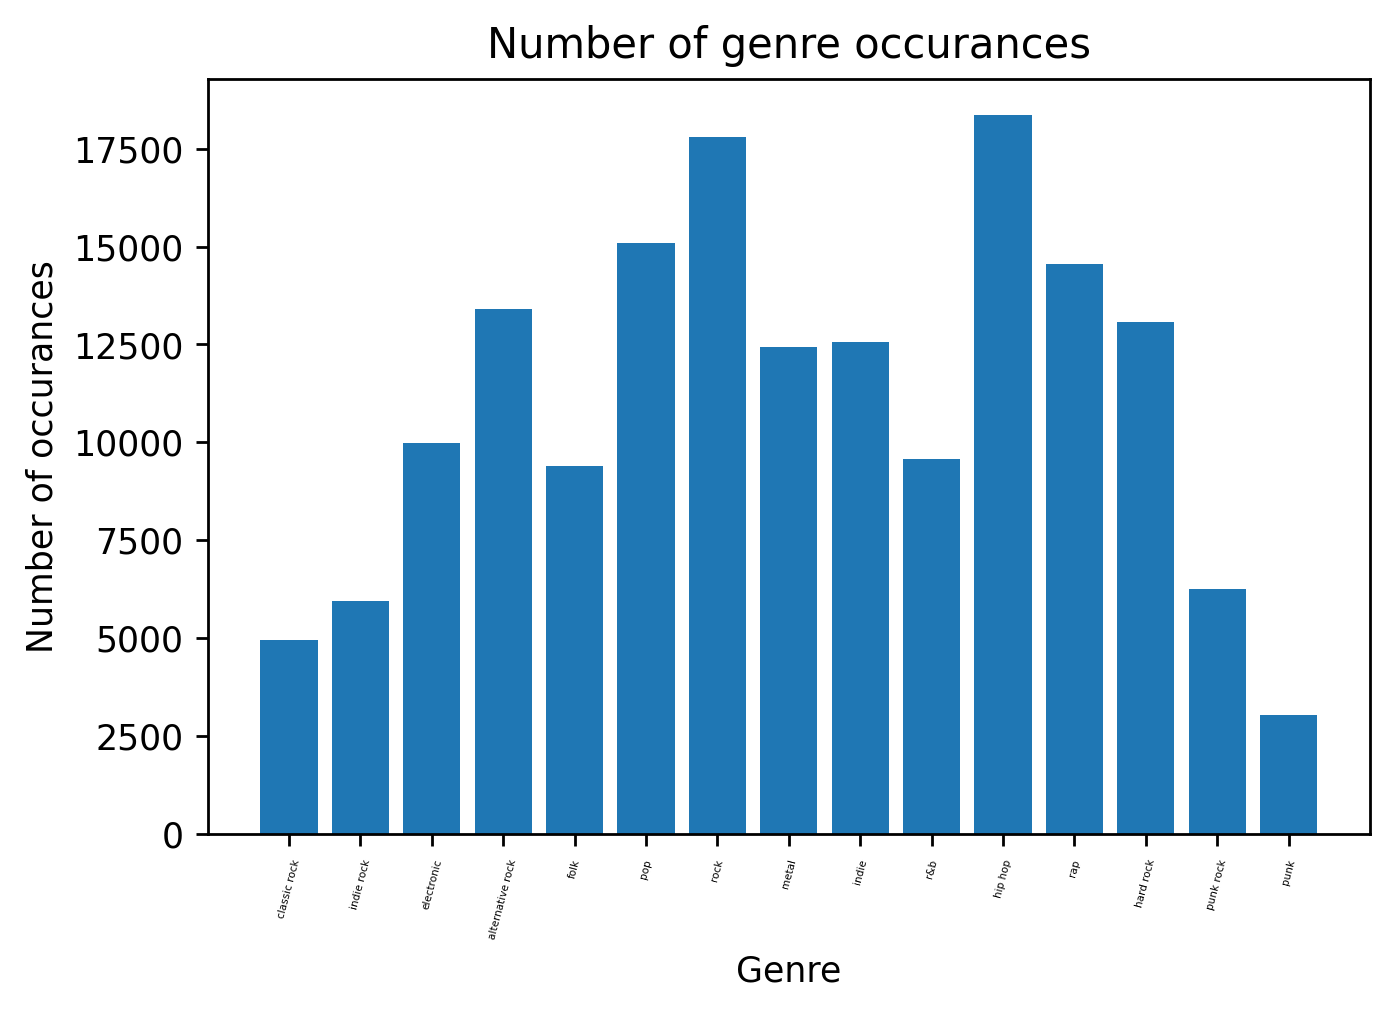

In [137]:
genres = get_new_genres(df)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [119]:
import random

def erase_common_genres2(df):
    new_genres = []
    
    for genre in df["genre"].split(","):
        if genres[genre] > 20000 and random.random() < (genres[genre]*0.1/max(genres.values())):
            continue
        else:
            new_genres.append(genre)
    
    return ','.join(new_genres)

genres = get_new_genres(df)
            
df["genre"] = df.apply(erase_common_genres2, axis=1)
df = df.drop(df[df["genre"] == ""].index)

In [139]:
df["nb_of_genres"] = df.apply(lambda x: len(x["genre"].split(",")), axis=1)
df["nb_of_genres"].value_counts()

2    56708
1    23660
3     8767
4      439
5       26
6        1
Name: nb_of_genres, dtype: int64

In [138]:
genres = get_new_genres(df)
df = df.drop(df[(df['nb_of_genres'] == 1) & (df.apply(lambda x: x["genre"] in [k for k, v in genres.items() if v > 10000], axis=1))].sample(frac=0.2).index)

In [140]:
df.to_csv(r"data_cleaned/final_cleaned_labeled2.csv", index=False)

## Now let's concatenate two datasets

In [120]:
df1 = pd.read_csv(r"data_cleaned/data_final_equalized.csv")
df2 = pd.read_csv(r"data_cleaned/data_final2_equalized.csv")

In [121]:
df1.head()

,track,genre,artist,lyrics
0,Girl in a Country Song,country,Maddie & Tae,No country music was harmed in the making of ...
1,Poison,new jack swing,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U..."
2,Baby It's Cold Outside (feat. Christina Aguilera),neo soul,CeeLo Green,I really can't stay Baby it's cold outside I'v...
3,Dumb Litty,dance pop,KARD,Get up out of my business You don't keep me fr...
4,Soldier,urban contemporary,James TW,"Hold your breath, don't look down, keep trying..."


In [122]:
df2.head()

,artist,track,album,genre,lyrics
0,Blue Öyster Cult,ME 262,Secret Treaties,classic rock,"Says: ""Willie's done quite a job"" Says: ""I'..."
1,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave",Absorbing your words Battles raging within me ...
2,Atlas Sound,Criminals,Logos,"indie rock,experimental",This criminal Walked into my room He asked me ...
3,Annisokay,Coma Blue,Arms,emo,"Fuck Nobody, anybody, somebody, who are you? ..."
4,Nickelback,Burn It To The Ground,Dark Horse,"hard rock,alternative rock,hard rock","Well, it's midnight, damn right, we're wound ..."


In [123]:
df2 = df2.drop("album", axis=1)

In [124]:
df2.head()

,artist,track,genre,lyrics
0,Blue Öyster Cult,ME 262,classic rock,"Says: ""Willie's done quite a job"" Says: ""I'..."
1,The Chameleons,Nostalgia,"post-punk,new wave",Absorbing your words Battles raging within me ...
2,Atlas Sound,Criminals,"indie rock,experimental",This criminal Walked into my room He asked me ...
3,Annisokay,Coma Blue,emo,"Fuck Nobody, anybody, somebody, who are you? ..."
4,Nickelback,Burn It To The Ground,"hard rock,alternative rock,hard rock","Well, it's midnight, damn right, we're wound ..."


In [125]:
import numpy as np

In [126]:
g1 = np.array(list(get_new_genres(df1).keys()))
g2 = np.array(list(get_new_genres(df2).keys()))
g = np.append(g1, g2)
print(g1.shape, g2.shape, g.shape)
g_unique, test = np.unique(g, return_inverse=True)
intersect = np.intersect1d(g1, g2)
print(intersect)
g_unique


(73,) (24,) (97,)
['classic rock' 'electronic' 'folk' 'hard rock' 'hardcore' 'metal'
 'new wave' 'pop' 'punk' 'rap' 'rock']


array(['alternative rock', 'axé', 'black music', 'blues', 'chillout',
       'classic rock', 'clássico', 'coletânea', 'country', 'dance',
       'dance pop', 'disco', 'edm', 'electronic', 'electronica',
       'electropop', 'emo', 'emocore', 'experimental', 'folk', 'funk',
       'funk carioca', 'gangster rap', 'gospel', 'grunge', 'gótico',
       'hard rock', 'hardcore', 'heavy metal', 'hip hop', 'hip-hop',
       'house', 'indie', 'indie pop', 'indie rock', 'industrial',
       'infantil', 'instrumental', 'j-pop', 'j-rock', 'jazz', 'k-pop',
       'k-rock', 'metal', 'metalcore', 'mpb', 'neo soul', 'new age',
       'new jack swing', 'new wave', 'permanent wave', 'piano rock',
       'pop', 'pop punk', 'post-hardcore', 'post-punk', 'power-pop',
       'progressive electro house', 'progressive rock', 'progressivo',
       'psicodelia', 'punk', 'punk rock', 'pós-punk', 'r&b', 'rap',
       'reggae', 'religioso', 'rock', 'rock alternativo', 'rockabilly',
       'romântico', 'singer-songw

In [127]:
from jellyfish import jaro_winkler_similarity

In [128]:
def get_similar(x, list_y):
    x = x.replace(" ", "")
    best_word = list_y[0]
    best_score = jaro_winkler_similarity(x,  list_y[0].replace(" ", ""))
    
    for i in list_y[1:]:
        if jaro_winkler_similarity(x, i.replace(" ", "")) > best_score:
            best_score = jaro_winkler_similarity(x, i.replace(" ", ""))
            best_word = i
    
    return best_word, best_score

In [129]:
g1 = get_new_genres(df1)
g2 = get_new_genres(df2)

similarity = dict()

for i in list(g1.keys()):
    similarity[i] = get_similar(i, list(g2.keys()))

for k, v in similarity.items():
    print(f"{k}: {v}")
    

country: ('pop punk', 0.6190476190476191)
new jack swing: ('new wave', 0.6436507936507937)
neo soul: ('emo', 0.6507936507936508)
dance pop: ('indie pop', 0.7777777777777778)
urban contemporary: ('metalcore', 0.6176470588235294)
gangster rap: ('singer-songwriter', 0.5874713521772345)
southern hip-hop: ('synthpop', 0.6611111111111111)
electropop: ('electronic', 0.88)
progressive electro house: ('progressive rock', 0.894120082815735)
edm: ('experimental', 0.611111111111111)
permanent wave: ('experimental', 0.665954415954416)
classic rock: ('classic rock', 1.0)
hip-hop: ('indie pop', 0.6904761904761904)
indie: ('indie pop', 0.925)
pop: ('pop', 1.0)
metal: ('metal', 1.0)
electronic: ('electronic', 1.0)
jazz: ('rap', 0.5277777777777778)
axé: ('hard rock', 0.4861111111111111)
romântico: ('metalcore', 0.6296296296296297)
mpb: ('punk', 0.5277777777777778)
r&b: ('rap', 0.5555555555555555)
black music: ('classic rock', 0.6595959595959596)
rap: ('rap', 1.0)
hip hop: ('indie pop', 0.722222222222222

In [130]:
change_dict = {
    "hip-hop": "hip hop",
    "axe": "",
    u"romantico": "",
    u"mpb": "",
    "trilha sonora": "",
    "religioso": "",
    "psicodelia": "psychedelic",
    "rock alternativo": "alternative rock",
    u"clássico": "classical",
    u"gótico": "gothic metal",
    "progressivo": "",
    u"coletânea": "",
    "infantil": "child music",
    u"funk carioca": "",
    "tecnopop": "technopop",
    "emocore": "emo",
    u"pós-punk": "post-punk"}

In [131]:
g1 = get_new_genres(df1)
g2 = get_new_genres(df2)

for i in g1.keys():
    print(repr(str(i)))
    
for i in g2.keys():
    print(repr(str(i)))

'country'
'new jack swing'
'neo soul'
'dance pop'
'urban contemporary'
'gangster rap'
'southern hip-hop'
'electropop'
'progressive electro house'
'edm'
'permanent wave'
'classic rock'
'hip-hop'
'indie'
'pop'
'metal'
'electronic'
'jazz'
'axé'
'romântico'
'mpb'
'r&b'
'black music'
'rap'
'hip hop'
'soul music'
'electronica'
'trilha sonora'
'dance'
'funk'
'religioso'
'gospel'
'disco'
'trip-hop'
'world music'
'reggae'
'rockabilly'
'rock'
'blues'
'folk'
'psicodelia'
'soft rock'
'hard rock'
'rock alternativo'
'hardcore'
'instrumental'
'house'
'piano rock'
'clássico'
'chillout'
'trance'
'gótico'
'heavy metal'
'progressivo'
'coletânea'
'infantil'
'new age'
'punk rock'
'funk carioca'
'surf music'
'tecnopop'
'pós-punk'
'k-pop'
'k-rock'
'power-pop'
'new wave'
'emocore'
'grunge'
'j-pop'
'j-rock'
'ska'
'industrial'
'punk'
'classic rock'
'post-punk'
'new wave'
'indie rock'
'experimental'
'emo'
'hard rock'
'alternative rock'
'soul'
'electronic'
'pop'
'rap'
'folk'
'synthpop'
'singer-songwriter'
'metalc

### Quick changes in genres names

In [132]:
def change_genres_names(genres_list):

    new_genres = []
    
    for genre in genres_list["genre"].split(","):
        if genre.strip() in list(change_dict.keys()) and len(change_dict[genre.strip()]) > 0:
            new_genres.append(change_dict[genre.strip()])
        else:
            new_genres.append(genre.strip())

    return ','.join(new_genres) 
    

In [133]:
df1['genre'] = df1['genre'].apply(lambda x: x.replace(",funk carioca", ""))
df1['genre'] = df1['genre'].apply(lambda x: x.replace("funk carioca", ""))

In [134]:
df1 = df1.drop(df1[df1["genre"] == ""].index)
df2 = df2.drop(df2[df2["genre"] == ""].index)

In [135]:
chack = set()

for i in df2["genre"]:
    for k in i.split(","):
        chack.add(k)

for i in df1["genre"]:
    for k in i.split(","):
        chack.add(k)
    
print(chack)

for i in change_dict.keys():
    if i in chack:
        print(f"{i}")

{'', 'axé', 'disco', 'trance', 'black music', 'heavy metal', 'mpb', 'country', 'j-pop', 'k-pop', 'emocore', 'post-punk', 'gospel', 'edm', 'blues', 'rockabilly', 'pós-punk', 'electropop', 'rock alternativo', 'religioso', 'romântico', 'permanent wave', 'industrial', 'punk', 'electronic', 'gangster rap', 'urban contemporary', 'pop punk', 'electronica', 'ska', 'psicodelia', 'indie rock', 'clássico', 'rock', 'power-pop', 'punk rock', 'progressive rock', 'progressivo', 'singer-songwriter', 'world music', 'jazz', 'neo soul', 'infantil', 'r&b', 'new age', 'reggae', 'metalcore', 'gótico', 'hip-hop', 'pop', 'coletânea', 'hard rock', 'piano rock', 'new jack swing', 'classic rock', 'surf music', 'funk', 'emo', 'hardcore', 'dance pop', 'trip-hop', 'hip hop', 'alternative rock', 'progressive electro house', 'soul music', 'j-rock', 'metal', 'k-rock', 'post-hardcore', 'new wave', 'indie', 'house', 'synthpop', 'indie pop', 'trilha sonora', 'experimental', 'instrumental', 'soul', 'grunge', 'southern hip

In [136]:
df1["genre"] = df1.apply(change_genres_names, axis=1)
df1 = df1.drop(df1[df1["genre"] == ""].index)

In [137]:
df2["genre"] = df2.apply(change_genres_names, axis=1)
df2 = df2.drop(df2[df2["genre"] == ""].index)

In [138]:
g1 = np.array(list(get_new_genres(df1).keys()))
g2 = np.array(list(get_new_genres(df2).keys()))
g = np.append(g1, g2)
print(g1.shape, g2.shape, g.shape)
g_unique, test = np.unique(g, return_inverse=True)
intersect = np.intersect1d(g1, g2)
print(intersect)
print(g1)
print(g2)

(72,) (24,) (96,)
['alternative rock' 'classic rock' 'electronic' 'emo' 'folk' 'hard rock'
 'hardcore' 'metal' 'new wave' 'pop' 'post-punk' 'punk' 'rap' 'rock']
['country' 'new jack swing' 'neo soul' 'dance pop' 'urban contemporary'
 'gangster rap' 'southern hip-hop' 'electropop'
 'progressive electro house' 'edm' 'permanent wave' 'classic rock'
 'hip hop' 'indie' 'pop' 'metal' 'electronic' 'jazz' 'axé' 'romântico'
 'mpb' 'r&b' 'black music' 'rap' 'soul music' 'electronica'
 'trilha sonora' 'dance' 'funk' 'religioso' 'gospel' 'disco' 'trip-hop'
 'world music' 'reggae' 'rockabilly' 'rock' 'blues' 'folk' 'psychedelic'
 'soft rock' 'hard rock' 'alternative rock' 'hardcore' 'instrumental'
 'house' 'piano rock' 'classical' 'chillout' 'trance' 'gothic metal'
 'heavy metal' 'progressivo' 'coletânea' 'child music' 'new age'
 'punk rock' 'surf music' 'technopop' 'post-punk' 'k-pop' 'k-rock'
 'power-pop' 'new wave' 'emo' 'grunge' '' 'j-pop' 'j-rock' 'ska'
 'industrial' 'punk']
['classic rock' 'p

In [139]:
genres = get_new_genres(df1)
            
df1["genre"] = df1.apply(erase_common_genres, axis=1)
df1 = df1.drop(df1[df1["genre"] == ""].index)

In [ ]:
df1.to_csv(r"data_cleaned/1.csv", index=False)
df2.to_csv(r"data_cleaned/2.csv", index=False)

In [108]:
df1 = pd.read_csv(r"data_cleaned/1.csv")
df2 = pd.read_csv(r"data_cleaned/2.csv")

In [140]:
df2.head()

,artist,track,genre,lyrics
0,Blue Öyster Cult,ME 262,classic rock,"Says: ""Willie's done quite a job"" Says: ""I'..."
1,The Chameleons,Nostalgia,"post-punk,new wave",Absorbing your words Battles raging within me ...
2,Atlas Sound,Criminals,"indie rock,experimental",This criminal Walked into my room He asked me ...
3,Annisokay,Coma Blue,emo,"Fuck Nobody, anybody, somebody, who are you? ..."
4,Nickelback,Burn It To The Ground,"hard rock,alternative rock,hard rock","Well, it's midnight, damn right, we're wound ..."


In [141]:
genres = get_new_genres(df1)
print(genres)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
# plt.title("Number of genre occurances")
# plt.ylabel('Number of occurances')
# plt.xlabel('Genre')
# plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

{'country': 1083, 'new jack swing': 880, 'neo soul': 989, 'dance pop': 768, 'urban contemporary': 877, 'gangster rap': 667, 'southern hip-hop': 1138, 'electropop': 836, 'progressive electro house': 565, 'edm': 519, 'permanent wave': 830, 'classic rock': 1105, 'hip hop': 2244, 'indie': 1141, 'pop': 1209, 'metal': 1098, 'electronic': 1182, 'jazz': 1021, 'axé': 1082, 'romântico': 1183, 'mpb': 759, 'r&b': 1182, 'black music': 1145, 'rap': 1187, 'soul music': 1125, 'electronica': 1125, 'trilha sonora': 1062, 'dance': 1130, 'funk': 1148, 'religioso': 1072, 'gospel': 1091, 'disco': 973, 'trip-hop': 1192, 'world music': 673, 'reggae': 992, 'rockabilly': 961, 'rock': 1159, 'blues': 1111, 'folk': 1177, 'psychedelic': 1095, 'soft rock': 1025, 'hard rock': 1171, 'alternative rock': 1142, 'hardcore': 1174, 'instrumental': 1013, 'house': 1173, 'piano rock': 960, 'classical': 1092, 'chillout': 971, 'trance': 650, 'gothic metal': 1098, 'heavy metal': 1152, 'progressivo': 1019, 'coletânea': 1162, 'chil

TypeError: 'NoneType' object is not callable

TypeError: 'NoneType' object is not callable

In [142]:
genres = get_new_genres(df2)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel('Number of occurances')
plt.xlabel('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

TypeError: 'NoneType' object is not callable

TypeError: 'NoneType' object is not callable

### Concatination

In [143]:
df = pd.concat([df1, df2], ignore_index=True)

In [144]:
genres = get_new_genres(df)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

TypeError: 'NoneType' object is not callable

TypeError: 'NoneType' object is not callable

### Another round of dropping to common genres from songs

In [297]:
def erase_common_genres2(df):
    new_genres = []
    
    for genre in df["genre"].split(","):
        if genres[genre] > 1000 and random.random() < (genres[genre]*0.1/max(genres.values())):
            continue
        else:
            new_genres.append(genre)
    
    return ','.join(new_genres)

In [299]:
genres = get_new_genres(df)
            
df["genre"] = df.apply(erase_common_genres2, axis=1)
df = df.drop(df[df["genre"] == ""].index)

In [548]:
# def drop_genres3(genres_list):
#     new_genres = []
    
#     for genre in genres_list.split(","):
#         if genres[genre] >= 350:
#             new_genres.append(genre)
    
#     return ','.join(new_genres) 

In [551]:
df["genre"] = df["genre"].apply(lambda x: drop_genres(x))
df = df.drop(df[df["genre"] == ""].index)

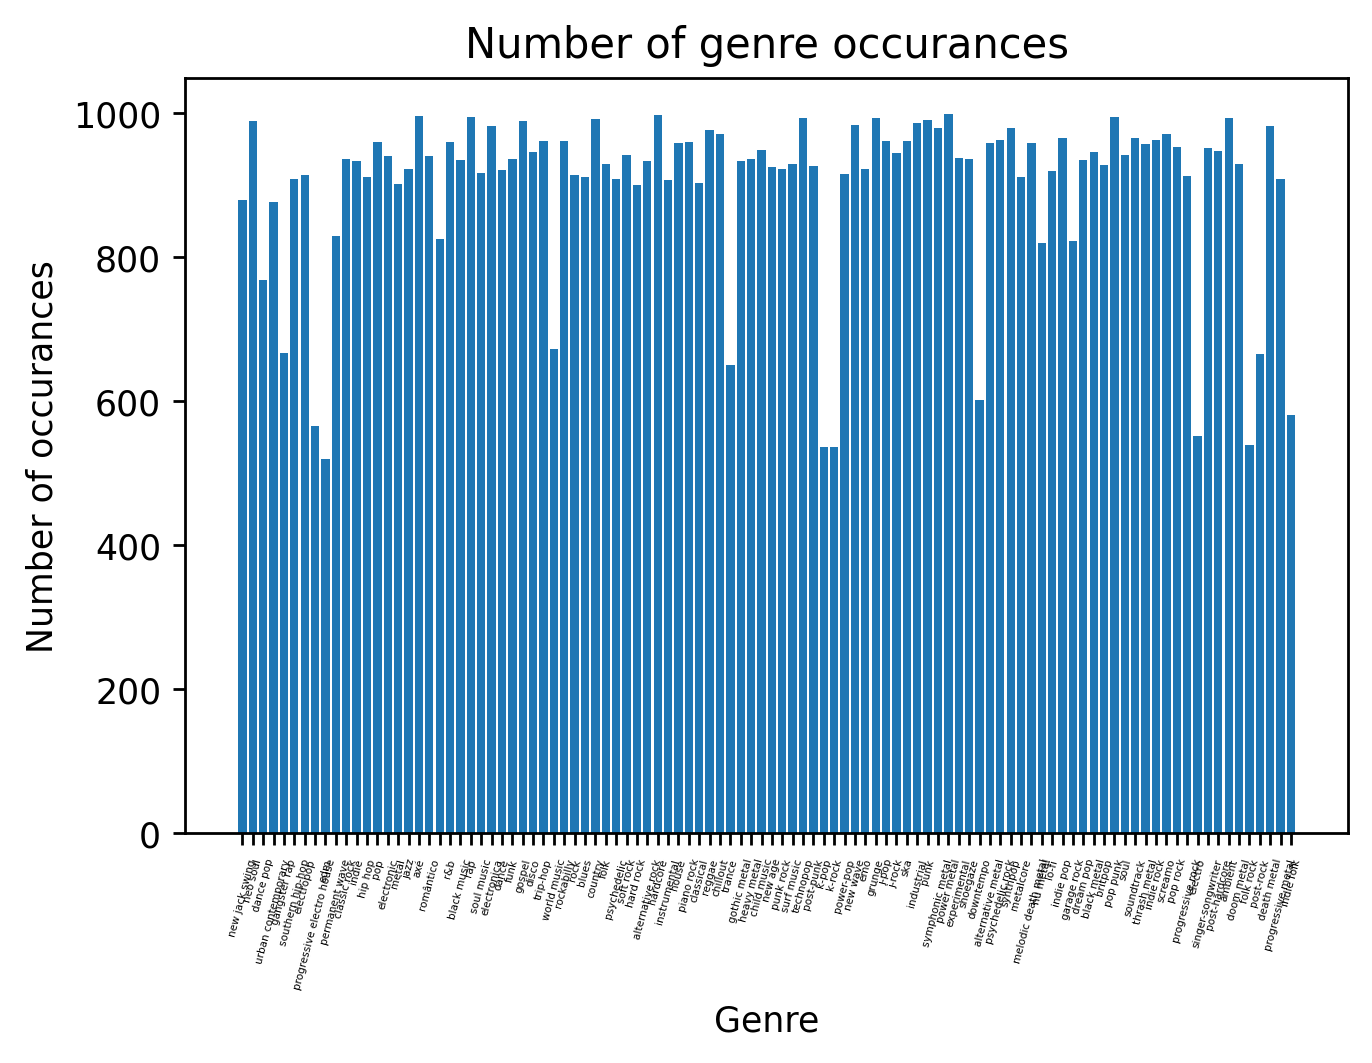

In [300]:
genres = get_new_genres(df)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel ('Number of occurances')
plt.xlabel ('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

In [301]:
unique_genres = set()

for row in df.genre:
    for item in row.split(","):
        unique_genres.add(item)
    
print(f"Number of unique genres: {len(unique_genres)}")
print(f"Number of songs: {len(df.index)}")

Number of unique genres: 102
Number of songs: 75803


In [305]:
df.head()

,genre,lyrics
1,new jack swing,"NA Yeah, Spyderman and Freeze in full effect U..."
2,neo soul,I really can't stay Baby it's cold outside I'v...
3,dance pop,Get up out of my business You don't keep me fr...
4,urban contemporary,"Hold your breath, don't look down, keep trying..."
5,new jack swing,All I want is somebody who's gonna love me for...


In [303]:
df = df.drop(["track", "artist"], axis=1)

In [306]:
df.to_csv(r"data_cleaned/final.csv", index=False)